In [1]:
lineas=sc.textFile("FR Sales.csv")

In [2]:
lineas.take(5)

['ProductID,Date,Zip,Units,Revenue,Country',
 '726,1/15/1999,75056 CEDEX 01,1,115.45,France',
 '1909,1/15/1999,75056 CEDEX 01,2,398.90,France',
 '1961,2/15/1999,75056 CEDEX 01,1,97.07,France',
 '1517,2/15/1999,75056 CEDEX 01,1,141.65,France']

In [7]:
tabla=lineas.map(lambda a:a.split(","))\
            .filter(lambda a:a[0]!="ProductID")\
            .map(lambda a:(int(a[0]),
                          a[1],
                          a[2],
                          int(a[3]),
                          float(a[4]),
                          a[5] 
                          ))


tabla.take(5)

[(726, '1/15/1999', '75056 CEDEX 01', 1, 115.45, 'France'),
 (1909, '1/15/1999', '75056 CEDEX 01', 2, 398.9, 'France'),
 (1961, '2/15/1999', '75056 CEDEX 01', 1, 97.07, 'France'),
 (1517, '2/15/1999', '75056 CEDEX 01', 1, 141.65, 'France'),
 (606, '2/15/1999', '75056 CEDEX 01', 1, 314.74, 'France')]

In [22]:
tabla.cache()

PythonRDD[18] at RDD at PythonRDD.scala:49

In [13]:
tabla.map(lambda a:a[4]).sum()

148491138.92023316

In [18]:
tabla.map(lambda a:a[4]).stats()

(count: 314750, mean: 471.7748655123057, stdev: 428.4481520419954, max: 43194.11, min: 0.0)

In [28]:
tabla.count()

314750

In [29]:
tabla.map(lambda a:a[4]).mean()

471.7748655123057

In [43]:
res=tabla.map(lambda a:(a[0],a[3]))\
        .reduceByKey(lambda a,b:a+b)\
        .sortBy(lambda a:-a[1])

In [44]:
res.count(),res.take(10)

(1716,
 [(475, 4317),
  (604, 3765),
  (2332, 3166),
  (487, 3123),
  (2254, 3067),
  (2255, 3067),
  (792, 2915),
  (791, 2915),
  (396, 2826),
  (2045, 2809)])

In [58]:
etiquetas=res.keys().take(10)

In [59]:
y=res.values().take(10)
x=range(len(y)) #[0,1,...,9]

In [60]:
import matplotlib.pyplot as grafica

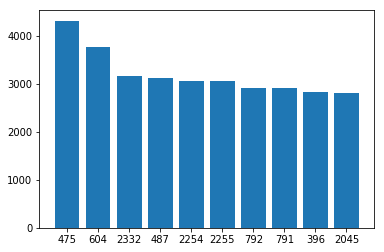

In [62]:
grafica.bar(x,y)
grafica.xticks(x,etiquetas)
grafica.show()

In [12]:
from datetime import datetime
datetime.strptime('2/15/1999',"%m/%d/%Y")

datetime.datetime(1999, 2, 15, 0, 0)